<a href="https://colab.research.google.com/github/SongyangZhou/TensorFlow_Implementing/blob/main/Main%20Algorithms%20Implementing%20In%20TensorFLow%20-%20Linear%20Regression%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear regression in TensorFlow


- prepare the environment

In [8]:
# import the environment
!pip install -q scikit-learn


In [9]:
%tensorflow_version 2.x

# make sure it is compatible with both Python 2 and Python 3
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [16]:
# load dataset
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training dataset
df_eval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # test dataset

# split predictors and label.
x_train = df_train.drop(columns=['survived'])
y_train = df_train['survived']
x_eval = df_eval.drop(columns=['survived'])
y_eval = df_eval['survived']

x_train.head() # Check the x_train. The lable "survived" is excluded.
y_train.head() # Check the y_train
x_eval.head() # Check the x_eval
# y_eval.head() # Check the y_eval

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [11]:
# better know about the data
x_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [12]:
x_train.shape

(627, 9)

<Axes: >

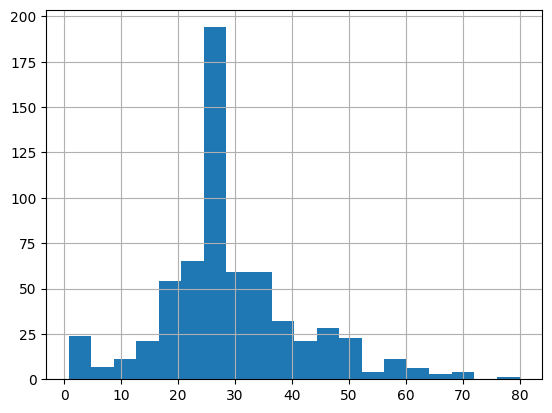

In [13]:
# we can also plot some histgram of some predictors, but it is not necessary
x_train.age.hist(bins=20)

- Feature Columns
this code block is to transfer the categorical and numeric data into the data structure that TensorFlow needs.

*Note: here we don't consider some variables as ordinal variables. *


In [20]:
# list all the categorical predictors
categorical_columns = ['sex', 'class', 'deck', 'embark_town', 'alone']
# list all the numeric predictors
numeric_columns = ['age', 'n_siblings_spouses', 'fare', 'parch']

# define a preprocessing pipeline
# standard code block, just remember there it is.
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

# apply the preprocessing pipeline to training and test data
x_train_processed = preprocessor.fit_transform(x_train)
x_eval_processed = preprocessor.transform(x_eval)



- build the linear regression model

In [23]:
model = Sequential([
    Dense(1, input_shape=(x_train_processed.shape[1],), activation='linear')
])

#Ccompile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


- Train the model

In [26]:
history = model.fit(x_train_processed, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1450 - mae: 0.2988 - val_loss: 0.1108 - val_mae: 0.2522
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1380 - mae: 0.2890 - val_loss: 0.1116 - val_mae: 0.2558
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1624 - mae: 0.3130 - val_loss: 0.1104 - val_mae: 0.2521
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1431 - mae: 0.2909 - val_loss: 0.1103 - val_mae: 0.2523
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1419 - mae: 0.2917 - val_loss: 0.1104 - val_mae: 0.2525
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1418 - mae: 0.2966 - val_loss: 0.1102 - val_mae: 0.2508
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1387 - mae: 0.2840 - val_loss: 0.1109 - val_mae: 0.2545
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1419 - mae: 0.2911 - val_loss: 0.1104 - val_mae: 0.2531
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1407 - mae: 

- evaluate the model using test data


In [27]:
test_loss, test_mae = model.evaluate(x_eval_processed, y_eval, verbose=1)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1558 - mae: 0.3149 
Test Loss: 0.155469611287117, Test MAE: 0.3101155459880829


Predict on the test data

In [28]:
y_pred = model.predict(x_eval_processed)
print(y_pred)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[ 0.08033282]
 [ 0.40727076]
 [ 0.74199   ]
 [ 0.65306425]
 [ 0.30268288]
 [ 0.7258533 ]
 [ 0.6270003 ]
 [ 0.14478767]
 [ 0.64706576]
 [ 0.70742726]
 [ 0.66598296]
 [ 0.14477032]
 [ 0.8244716 ]
 [ 0.4386446 ]
 [ 1.0023776 ]
 [ 0.48512086]
 [ 0.1650239 ]
 [ 0.8276311 ]
 [ 0.5373336 ]
 [ 0.10795629]
 [ 0.149378  ]
 [ 0.06303322]
 [ 0.6810751 ]
 [ 0.06651032]
 [ 0.6778139 ]
 [ 0.5890142 ]
 [ 0.22873676]
 [ 0.36773226]
 [ 0.22925559]
 [ 0.89687955]
 [ 0.1403571 ]
 [ 0.76544464]
 [ 0.25465822]
 [ 0.65981674]
 [ 0.25012106]
 [ 0.11714649]
 [ 0.41352862]
 [ 0.1763916 ]
 [ 0.9024972 ]
 [ 0.10335237]
 [ 0.72210574]
 [ 0.18182027]
 [ 0.46079412]
 [ 0.38769263]
 [ 0.3338117 ]
 [ 0.7395849 ]
 [ 0.14477897]
 [ 0.46122038]
 [ 0.52261746]
 [ 0.54064405]
 [ 0.04114848]
 [ 0.2822817 ]
 [ 0.05484325]
 [ 0.0827615 ]
 [ 0.15859944]
 [ 0.1309064 ]
 [ 0.2316386 ]
 [ 1.0493785 ]
 [ 0.24545036]
 [ 0.11254948]
 [ 0.2941448 ]
 [ 0.5752102 ]
 [ 0.25908846]
 [ 0.8510796 ]
 [

- Save the model you trained, and apply to other new data for prediction.

In [ ]:
from tensorflow.keras.models import load_model
# save model
model.save('my_model.h5') # give your own doc path
# load model
model_loaded = load_model('my_model.h5') # give your own doc path

# apply to new data
# don't forget to do the preprocessing to the new data
x_new_processed = preprocessor.transform(x_new)
y_pred_new = model_loaded.predict(x_new_processed)
print(y_pred_new)